In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('loan_approval_dataset.csv')

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
df= df.drop(columns='loan_id')

In [39]:
df.describe(include="object").T

,count,unique,top,freq
education,4269,2,Graduate,2144
self_employed,4269,2,Yes,2150
loan_status,4269,2,Approved,2656


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [8]:
df.isnull().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [9]:
df[df.duplicated()]

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


In [10]:
old_column_names = df.columns.tolist()
new_column_names =[]
for col in old_column_names:
    col = col.replace(' ', '')
    new_column_names.append(col)
print(new_column_names)
df.columns= new_column_names

['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


## Univariate Analysis

### Num. Var.

In [13]:
df.select_dtypes(include=np.number).columns.tolist() 

['no_of_dependents',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value']

In [14]:
numerical_var= df.select_dtypes(include=np.number).columns.tolist()[1:3] + df.select_dtypes(include=np.number).columns.tolist()[4:]

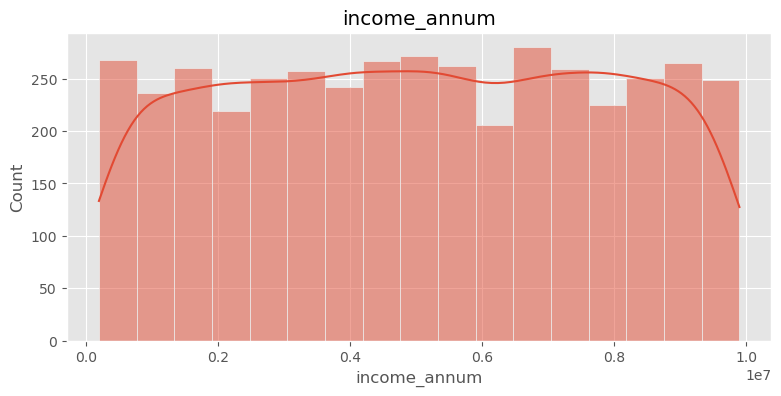

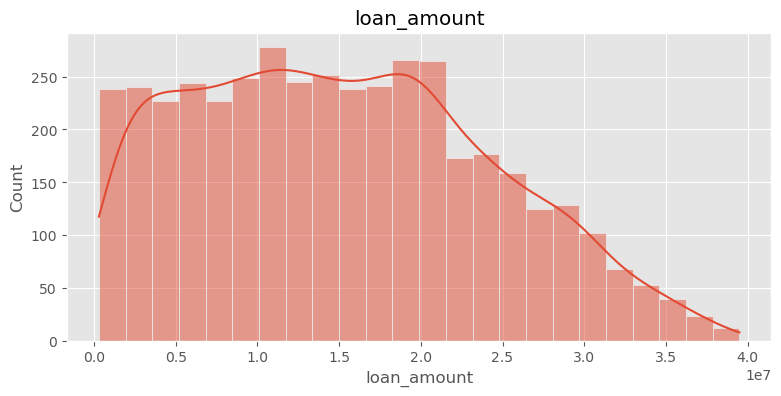

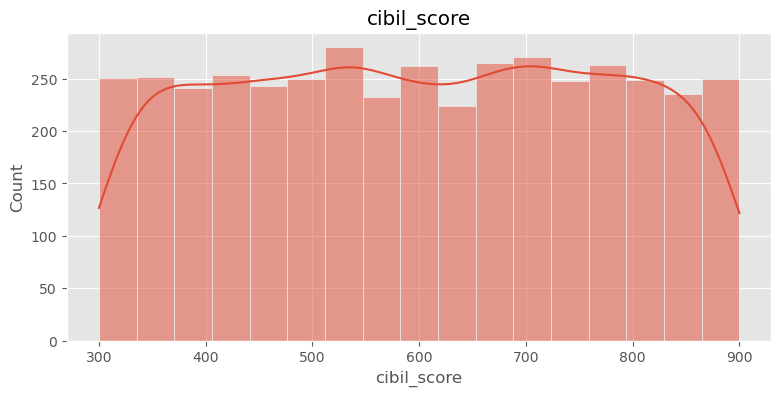

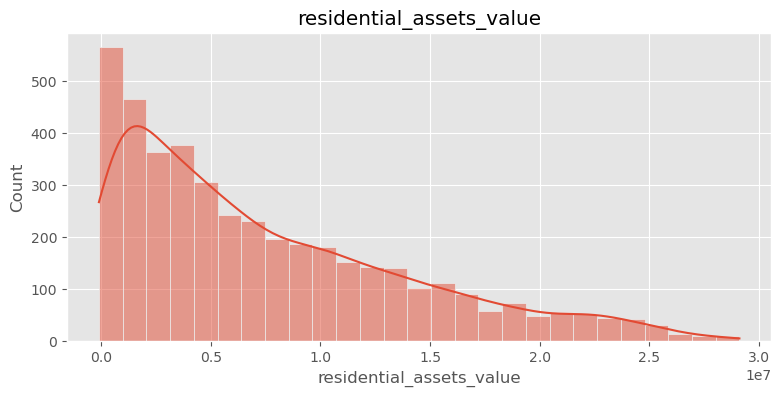

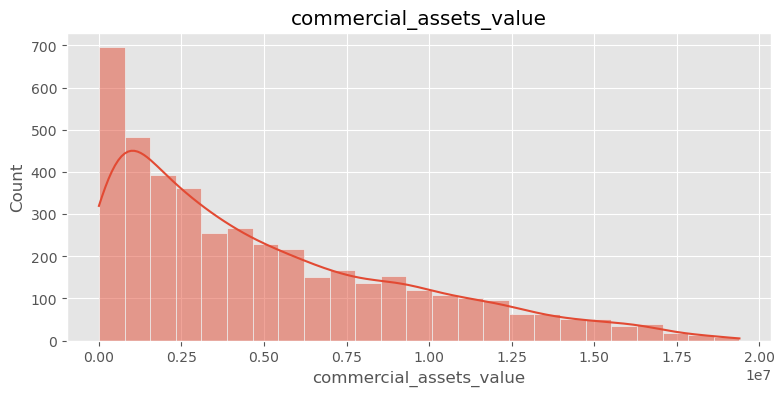

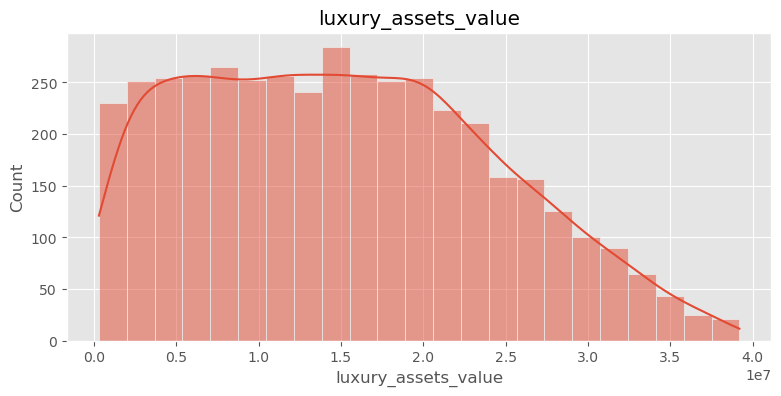

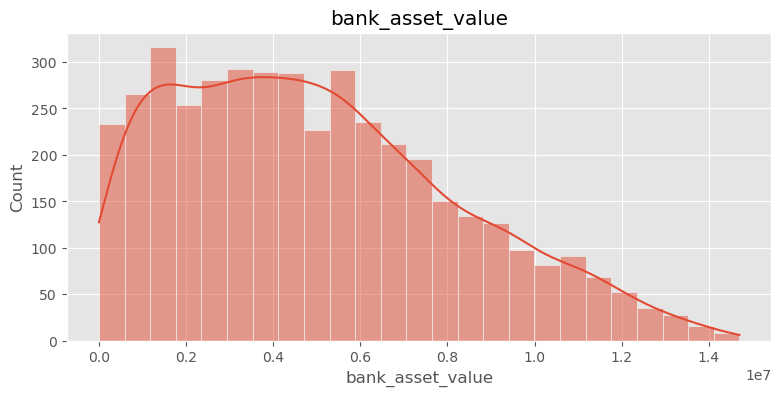

In [15]:
plt.style.use("ggplot")
for column in numerical_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.histplot(df[column], kde=True)
    plt.title(column)

### Cat. Var.

In [ ]:
plt.style.use("ggplot")

In [17]:
cat_var= df.columns[~df.columns.isin(numerical_var)].tolist()

In [21]:
cat_var[:-1]

['no_of_dependents', 'education', 'self_employed', 'loan_term']

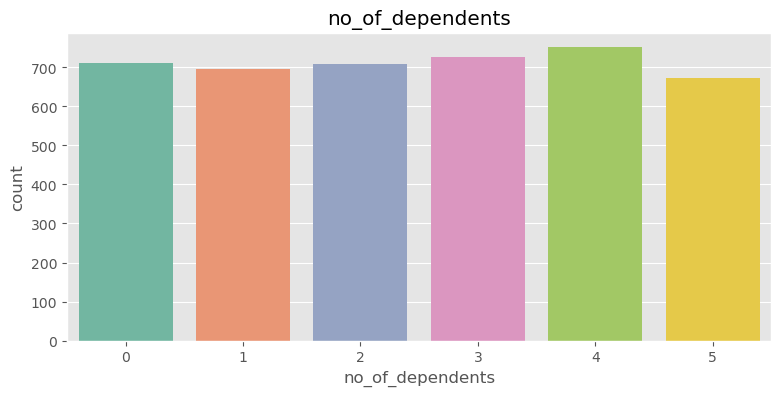

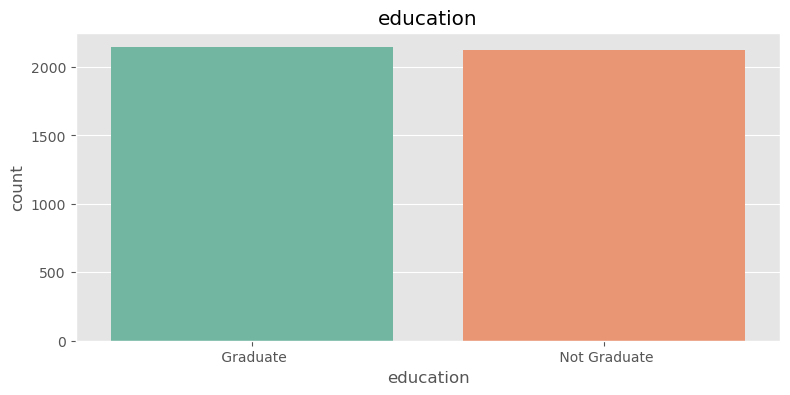

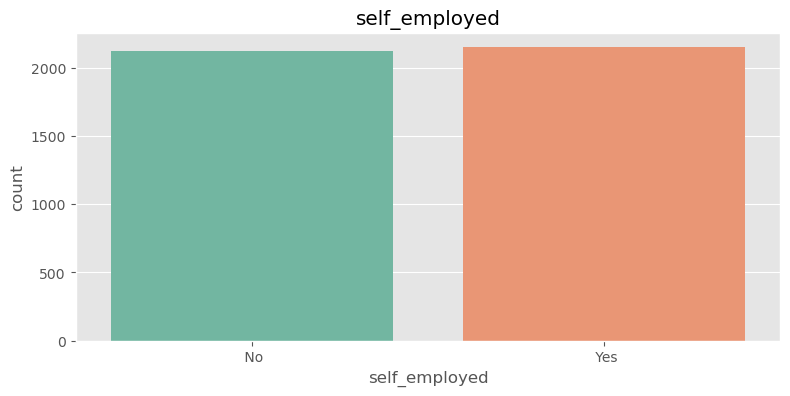

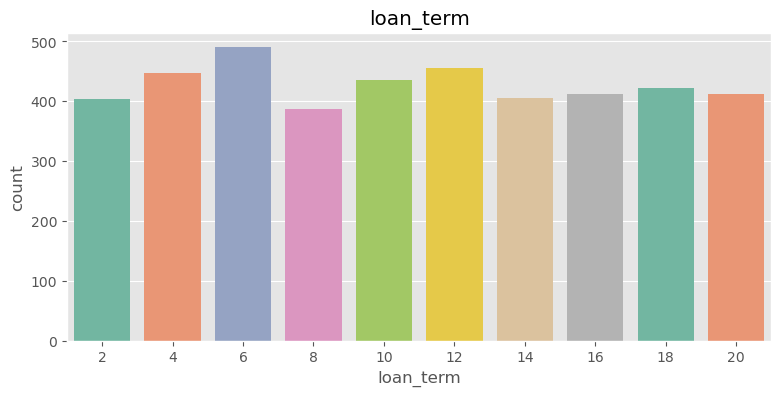

In [22]:
plt.style.use("ggplot")
for column in cat_var[:-1]:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(data = df,
              x =column, palette = "Set2")
    plt.title(column)

### Multivariate Analysis

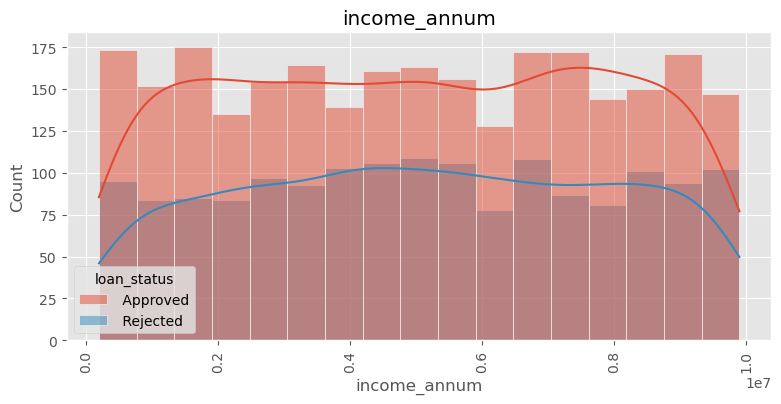

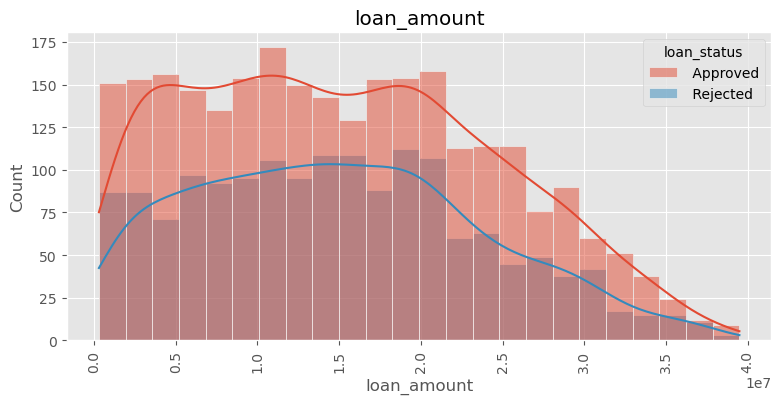

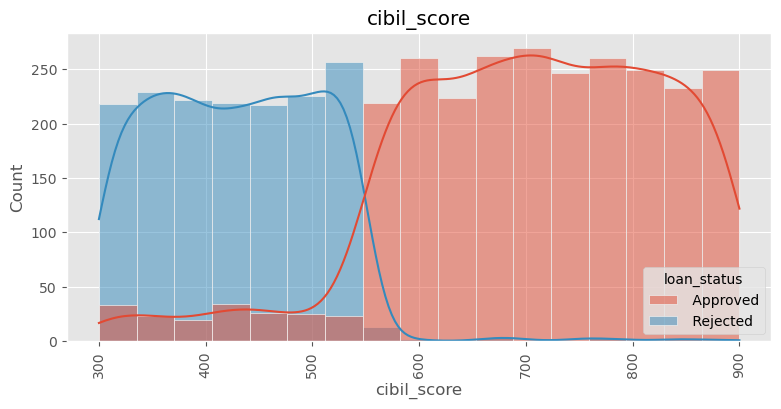

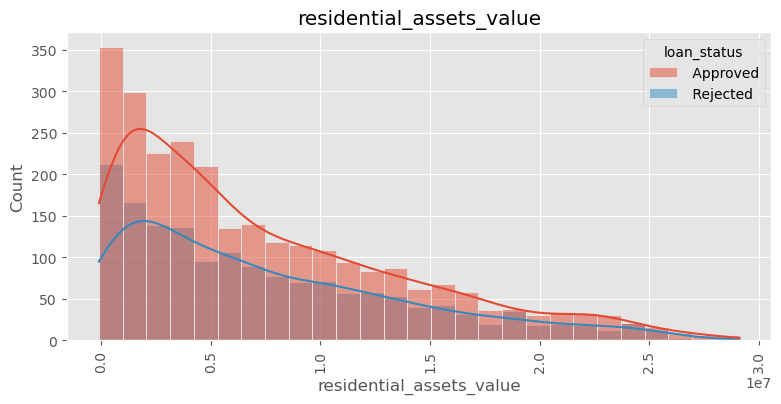

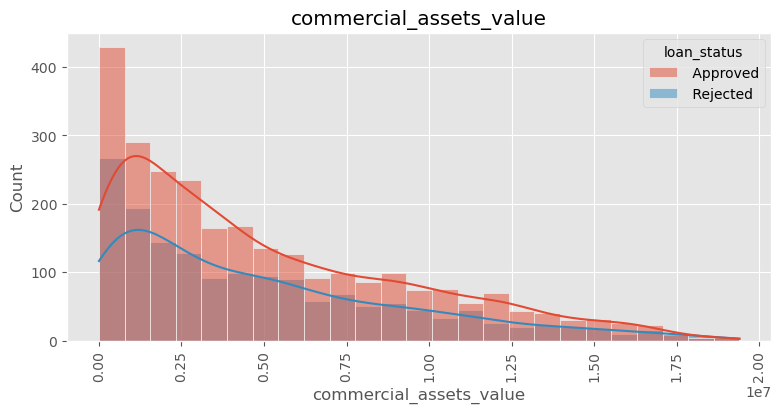

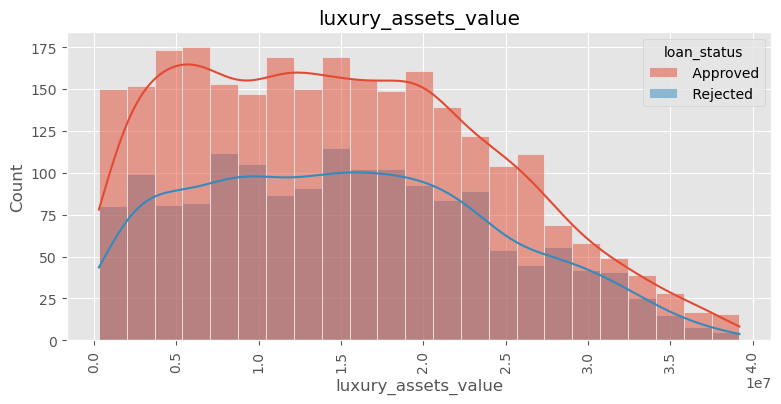

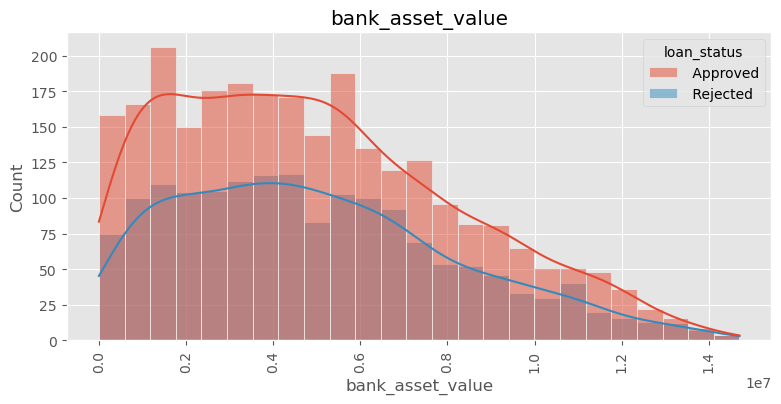

In [27]:
plt.style.use("ggplot")
for column in numerical_var[:]:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    #sns.countplot(data= df, x=column, hue="loan_status")
    sns.histplot(data=df,x=column, hue= 'loan_status',kde=True)
    plt.title(column)    
    plt.xticks(rotation=90)

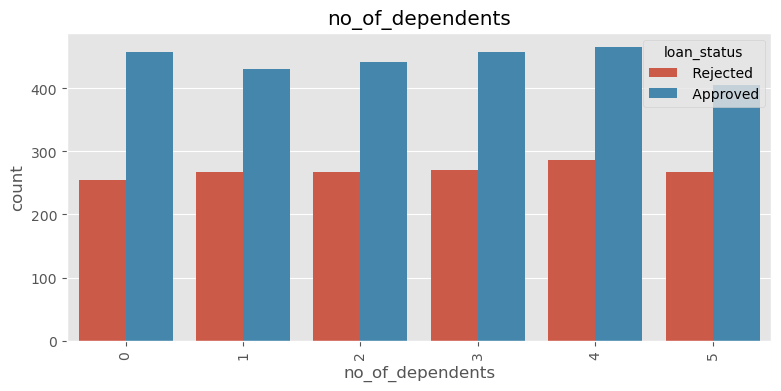

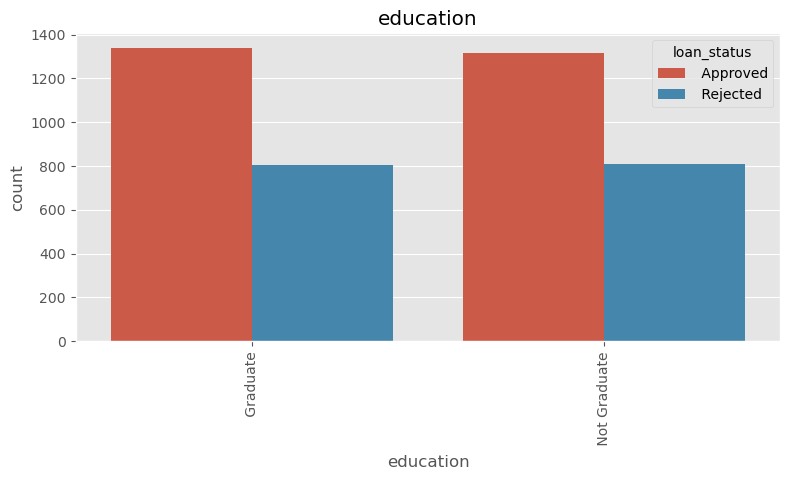

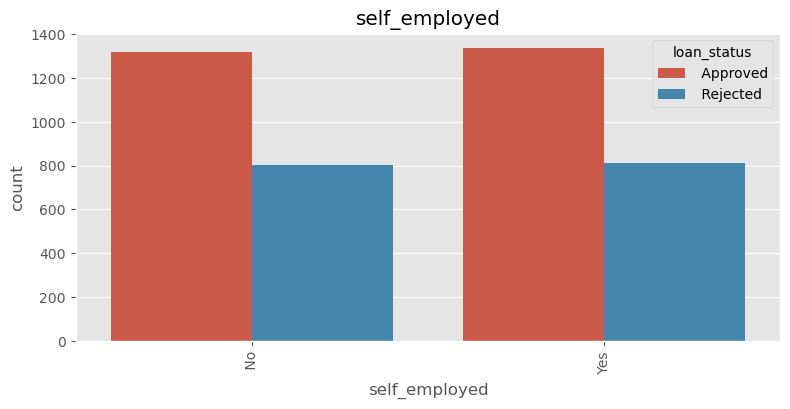

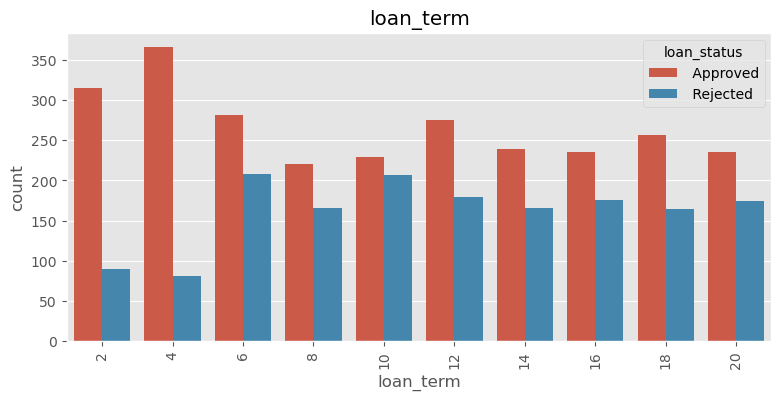

In [24]:
plt.style.use("ggplot")
for column in cat_var[:-1]:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(data= df, x=column, hue="loan_status")
    plt.title(column)    
    plt.xticks(rotation=90)

<Axes: >

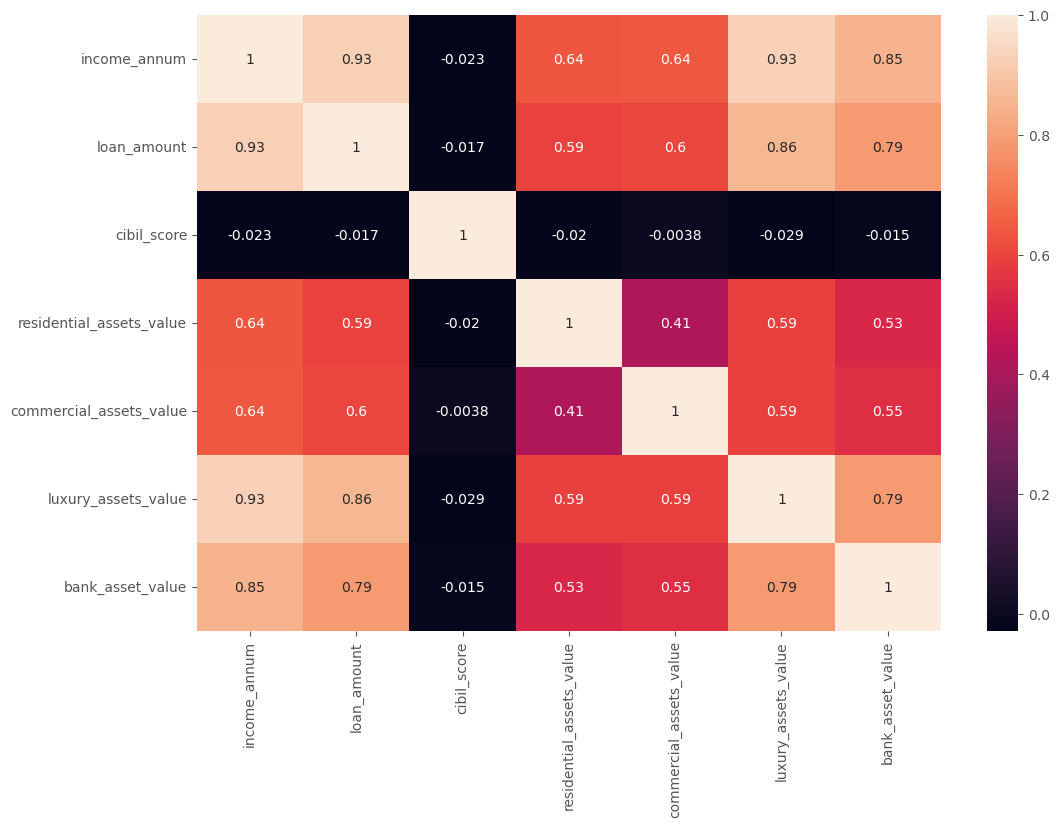

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_var].corr(), annot=True)

In [33]:
import scipy.stats as stats

In [30]:
df['loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [31]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [38]:
for column in numerical_var:
    p_val= stats.ttest_ind(df[df["loan_status"]==' Approved'][column],
                df[df["loan_status"]==' Rejected'][column]).pvalue
    print(column + "  ----  " +  str(p_val))
    

income_annum  ----  0.321105124071832
loan_amount  ----  0.29145225045092293
cibil_score  ----  0.0
residential_assets_value  ----  0.34801479256318013
commercial_assets_value  ----  0.5901515011092731
luxury_assets_value  ----  0.31240360685550905
bank_asset_value  ----  0.6579376940182001
